## 문제 0 기본 세팅. 
tidyverse, data.table, gridExtra를 부른 후, setwd로 ‘data.csv’ 및 ‘test.csv’가 있는
폴더로 경로를 설정하고, fread로 ‘data.csv’와 ‘test.csv’를 불러오세요.

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
test = pd.read_csv('test.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4087 non-null   int64  
 1   gender             4087 non-null   object 
 2   age                4087 non-null   float64
 3   hypertension       4087 non-null   int64  
 4   heart_disease      4087 non-null   int64  
 5   ever_married       4087 non-null   object 
 6   work_type          4087 non-null   object 
 7   Residence_type     4087 non-null   object 
 8   avg_glucose_level  4087 non-null   float64
 9   bmi                3922 non-null   float64
 10  smoking_status     4087 non-null   object 
 11  stroke             4087 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 383.3+ KB


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1023 non-null   int64  
 1   gender             1023 non-null   object 
 2   age                1023 non-null   float64
 3   hypertension       1023 non-null   int64  
 4   heart_disease      1023 non-null   int64  
 5   ever_married       1023 non-null   object 
 6   work_type          1023 non-null   object 
 7   Residence_type     1023 non-null   object 
 8   avg_glucose_level  1023 non-null   float64
 9   bmi                987 non-null    float64
 10  smoking_status     1023 non-null   object 
 11  stroke             1023 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 96.0+ KB


## 문제 1. 
‘bmi(bmi 지수)’ 변수를 numeric 자료형으로 바꾸고, NA값을 mean imputation으로 채우세요

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
bmi = data['bmi'].values.reshape(-1,1)
data['bmi'] = imputer.fit_transform(bmi)

In [5]:
data['bmi'].isnull().sum()

0

## 문제 2.
문자형(character) 변수를 명목형 변수(factor)로 바꾸세요.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4087 non-null   int64  
 1   gender             4087 non-null   object 
 2   age                4087 non-null   float64
 3   hypertension       4087 non-null   int64  
 4   heart_disease      4087 non-null   int64  
 5   ever_married       4087 non-null   object 
 6   work_type          4087 non-null   object 
 7   Residence_type     4087 non-null   object 
 8   avg_glucose_level  4087 non-null   float64
 9   bmi                4087 non-null   float64
 10  smoking_status     4087 non-null   object 
 11  stroke             4087 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 383.3+ KB


In [7]:
char_cols = [i for i in data if data[i].dtype == object]
for i in char_cols:
    data[i] = data[i].astype('category')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 4087 non-null   int64   
 1   gender             4087 non-null   category
 2   age                4087 non-null   float64 
 3   hypertension       4087 non-null   int64   
 4   heart_disease      4087 non-null   int64   
 5   ever_married       4087 non-null   category
 6   work_type          4087 non-null   category
 7   Residence_type     4087 non-null   category
 8   avg_glucose_level  4087 non-null   float64 
 9   bmi                4087 non-null   float64 
 10  smoking_status     4087 non-null   category
 11  stroke             4087 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 244.4 KB


## 문제 3. 
‘id’ 변수를 제거하세요

In [9]:
data = data.drop('id', axis=1)

## 문제 4. 
타겟(stoke)값 별로 범주형 변수의 분포를 다음과 같이 시각화 하고, 간단히 해석해보세요.
(gather, gridExtra 패키지 내 함수 이용).


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

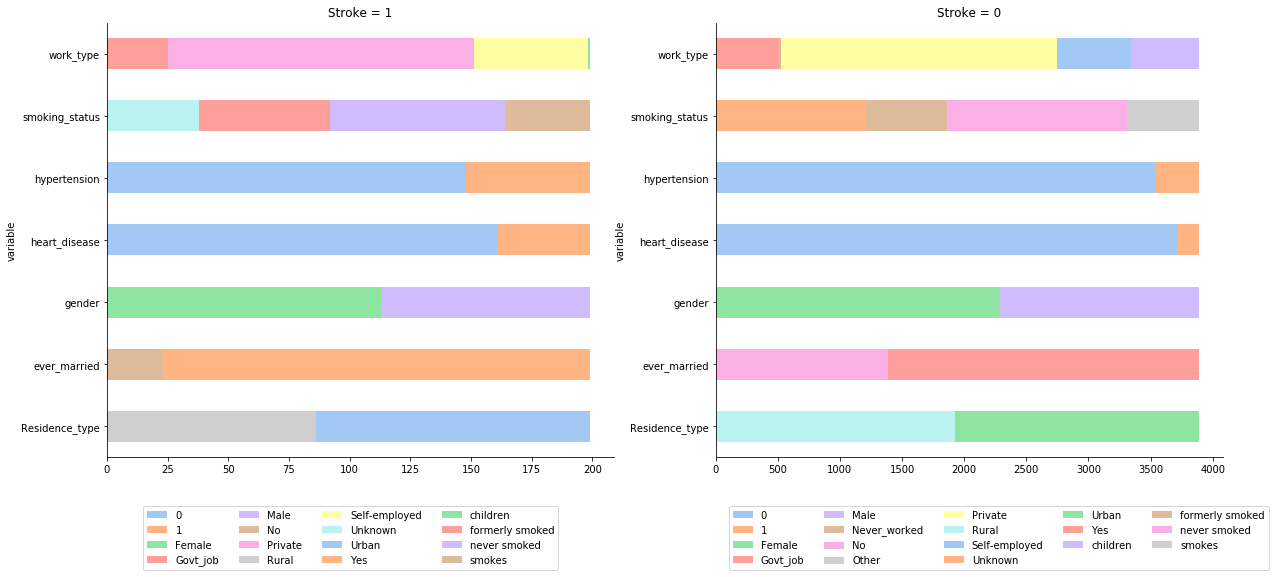

In [11]:
cat_cols=['work_type','smoking_status','Residence_type','hypertension','heart_disease','gender','ever_married']
clr = sns.color_palette('pastel')
fig, ax = plt.subplots(1,2, figsize=(20,8))
stroke1 = pd.melt(data[data['stroke']==1][cat_cols])
stroke0 = pd.melt(data[data['stroke']==0][cat_cols])
pd.crosstab(stroke1['variable'], stroke1['value']).plot.barh(stacked=True, ax=ax[0], color=clr, title="Stroke = 1")
pd.crosstab(stroke0['variable'], stroke0['value']).plot.barh(stacked=True, ax=ax[1], color=clr, title="Stroke = 0")
ax[0].legend(bbox_to_anchor=(0.9,-0.1),ncol=4)
ax[1].legend(bbox_to_anchor=(1.1,-0.1),ncol=5)
for i in range(2):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

## 문제 5.
타겟(stoke)값 별로 수치형 변수의 분포를 다음과 같이 시각화 하고, 간단히 해석해보세요.
(gather, gridExtra 패키지 내 함수 이용).


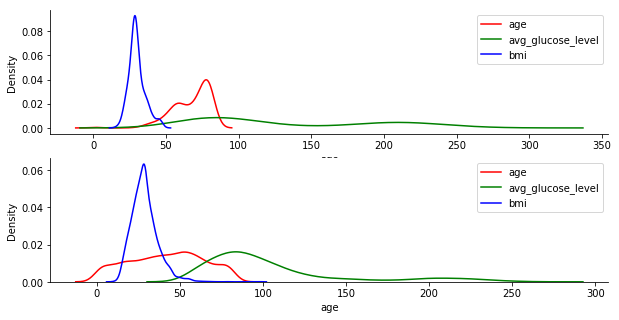

In [12]:
num_cols=['age', 'avg_glucose_level', 'bmi']
clr = ['r','g','b']
sns.set_palette(sns.color_palette(clr))
fig, ax = plt.subplots(2,1,figsize=(10,5))
stroke1 = data[data['stroke']==1][num_cols]
stroke0 = data[data['stroke']==0][num_cols]
for i in num_cols:
    sns.kdeplot(data=stroke1, x=i, ax=ax[0], label=i)
    sns.kdeplot(data=stroke0, x=i, ax=ax[1], label=i)
for i in range(2):
    ax[i].legend()
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

## 문제 6.
타겟 변수와 범주형 변수에 대한 카이스퀘어 독립성 검정을 진행하고 다음과 같이 출력하세요. 
(데이터프레임을 만든 후, for 문으로 독립성 검정을 진행하여 chi 변수에 검정 결과를 넣으세요.)

In [13]:
from scipy.stats import chi2_contingency

In [14]:
chi_df = pd.DataFrame({"cate_var":cat_cols, "chi": "NA"})
chi_df

,cate_var,chi
0,work_type,NA
1,smoking_status,NA
2,Residence_type,NA
3,hypertension,NA
4,heart_disease,NA
5,gender,NA
6,ever_married,NA


In [15]:
for n,i in enumerate(cat_cols):
    tmp = pd.crosstab(data[i], data["stroke"])
    chi_df.iloc[n]['chi'] = chi2_contingency(tmp)[1]
chi_df

,cate_var,chi
0,work_type,0.0
1,smoking_status,0.000078
2,Residence_type,0.09553
3,hypertension,0.0
4,heart_disease,0.0
5,gender,0.83015
6,ever_married,0.0


## 문제 7. 
카이스퀘어 독립성 검정에서 가설을 기각하지 못한 범주형 변수를 제거하세요.

In [16]:
drop_col = []
for i in range(len(cat_cols)):
    if chi_df.iloc[i]['chi'] > 0.05:
        drop_col.append(chi_df.iloc[i]['cate_var'])
data = data.drop(columns=drop_col)

In [17]:
data

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,228.69,36.600000,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,202.21,28.827817,never smoked,1
2,80.0,0,1,Yes,Private,105.92,32.500000,never smoked,1
3,49.0,0,0,Yes,Private,171.23,34.400000,smokes,1
4,79.0,1,0,Yes,Self-employed,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...
4082,80.0,1,0,Yes,Private,83.75,28.827817,never smoked,0
4083,81.0,0,0,Yes,Self-employed,125.20,40.000000,never smoked,0
4084,35.0,0,0,Yes,Self-employed,82.99,30.600000,never smoked,0
4085,51.0,0,0,Yes,Private,166.29,25.600000,formerly smoked,0


## 문제 8.
train data에서 했던 전처리 방법들을 사용하여 전처리 하세요

In [18]:
imputer = SimpleImputer(strategy='mean')
bmi = test['bmi'].values.reshape(-1,1)
test['bmi'] = imputer.fit_transform(bmi)

In [19]:
char_cols = [i for i in test if test[i].dtype == object]
for i in char_cols:
    test[i] = test[i].astype('category')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 1023 non-null   int64   
 1   gender             1023 non-null   category
 2   age                1023 non-null   float64 
 3   hypertension       1023 non-null   int64   
 4   heart_disease      1023 non-null   int64   
 5   ever_married       1023 non-null   category
 6   work_type          1023 non-null   category
 7   Residence_type     1023 non-null   category
 8   avg_glucose_level  1023 non-null   float64 
 9   bmi                1023 non-null   float64 
 10  smoking_status     1023 non-null   category
 11  stroke             1023 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 61.8 KB


In [20]:
test = test.drop(columns=drop_col)
test = test.drop(columns=['id'])
test.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,81.0,0,0,Yes,Private,186.21,29.000000,formerly smoked,1
1,50.0,1,0,Yes,Self-employed,167.41,30.900000,never smoked,1
2,52.0,1,0,Yes,Self-employed,233.29,48.900000,never smoked,1
3,65.0,0,0,Yes,Private,100.98,28.200000,formerly smoked,1
4,59.0,0,0,Yes,Private,211.78,29.153191,formerly smoked,1


# Chapter 2. Catboost
## 문제 0.
Catboost 모델의 특성 및 대표적인 파라미터에 대해 간단히 설명하세요

decision tree에서 gradient boosting을 기반으로 하는 머신러닝 방법
level-wise하게 트리를 만든다. (BFS처럼)

숫자형 피쳐와 범주형 피쳐를 모두 지원한다

max_depth - 트리 깊이

learning_rate - 학습률(step size)

n_estimators - 트리의 수

loss_function - 손실함수

eval_metric - 평가척도

## 문제 1.
expand.grid를 사용하여 다음과 같은 데이터 프레임을 만드세요. (데이터 프레임명: logloss_cb)

In [21]:
from itertools import product
depth=[4,6,8]
iterations=[100,200]
x=list(product(depth, iterations))
c={'depth':[i[0] for i in x],'iterations':[i[1] for i in x], 'logloss':'NA'}
logloss_cb=pd.DataFrame(c)
logloss_cb

,depth,iterations,logloss
0,4,100,NA
1,4,200,NA
2,6,100,NA
3,6,200,NA
4,8,100,NA
5,8,200,NA


## 문제 2.
Catboost에 대해 depth와 iteration 파라미터 튜닝을 위한 grid search 5-fold CV를 진행하세요

In [22]:
import catboost as cb
import time


In [23]:
cat_cols = ['ever_married', 'work_type', 'smoking_status', 'hypertension', 'heart_disease']
pool_data = cb.Pool(data.iloc[:,:-1], label=data['stroke'], cat_features = [1,2,3,4,7])

In [24]:
from catboost import cv

param={'depth':depth, 'iterations': iterations}
start = time.time()
loss_list = []
for i in depth:
    for j in iterations:
        params={'depth':i, 'iterations':j, 'loss_function':'Logloss'}
        result = cv(pool_data, params, verbose=False, fold_count=5, partition_random_seed=1234)
        loss = result['test-Logloss-mean'].min()
        loss_list.append(round(loss,4))
        
end = time.time()
print(f'총 {end-start:.1f} 초')

총 160.0 초


In [25]:
logloss_cb['logloss'] = loss_list
logloss_cb

,depth,iterations,logloss
0,4,100,0.1589
1,4,200,0.1573
2,6,100,0.1579
3,6,200,0.1570
4,8,100,0.1575
5,8,200,0.1576


## 문제 3.
logloss_cb에서 가장 낮은 logloss 값의 행을 출력하세요

In [26]:
minloss = logloss_cb[logloss_cb['logloss']==logloss_cb['logloss'].min()]
minloss

,depth,iterations,logloss
3,6,200,0.157


## 문제 4.
가장 낮은 logloss 값의 파라미터로 전체 데이터를 학습시켜 test set에 대한 logloss값을 구하세
요.

In [27]:
from catboost import CatBoostClassifier
p = logloss_cb.loc[minloss.index[0]]
model = CatBoostClassifier(depth=p[0], iterations=p[1], loss_function='Logloss', random_state=1234)
model.fit(pool_data, verbose=False)


In [28]:
pool_test= cb.Pool(test.iloc[:,:-1], test['stroke'],cat_features=[1,2,3,4,7])
loss = model.eval_metrics(pool_test,['Logloss'])
min(loss['Logloss'])

0.16199213891445144

# Chapter 3. K-means Clustering
## 문제 1.
수치형 변수(age, avg_glucose_level, bmi)에 대해 scale 함수로 정규화 스케일링을 하세요.

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
origin_data=data.copy()
num_cols = ['age','avg_glucose_level','bmi']
data[num_cols] = sc.fit_transform(data[num_cols])

In [30]:
data

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.816895,0,1,Yes,Private,0.801173,0.301260,formerly smoked,1
1,0.743652,0,0,Yes,Self-employed,0.678875,0.212232,never smoked,1
2,0.975586,0,1,Yes,Private,0.234159,0.254296,never smoked,1
3,0.597168,0,0,Yes,Private,0.535793,0.276060,smokes,1
4,0.963379,1,0,Yes,Self-employed,0.549141,0.156930,never smoked,1
...,...,...,...,...,...,...,...,...,...
4082,0.975586,1,0,Yes,Private,0.131766,0.212232,never smoked,0
4083,0.987793,0,0,Yes,Self-employed,0.323203,0.340206,never smoked,0
4084,0.426270,0,0,Yes,Self-employed,0.128256,0.232532,never smoked,0
4085,0.621582,0,0,Yes,Private,0.512978,0.175258,formerly smoked,0


## 문제 2. 
fviz_nbclust 함수로 다음과 같이 시각화 한 뒤, 적절한 K값이 무엇인지 설명하세요.

In [31]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores = []
ss = []
for i in range(1,11):
    score=0
    km = KMeans(n_clusters=i, random_state=1234).fit(data[num_cols])
    ss.append(km.inertia_)
    if i>1:
        score = silhouette_score(data[num_cols], km.labels_)
    scores.append(score)

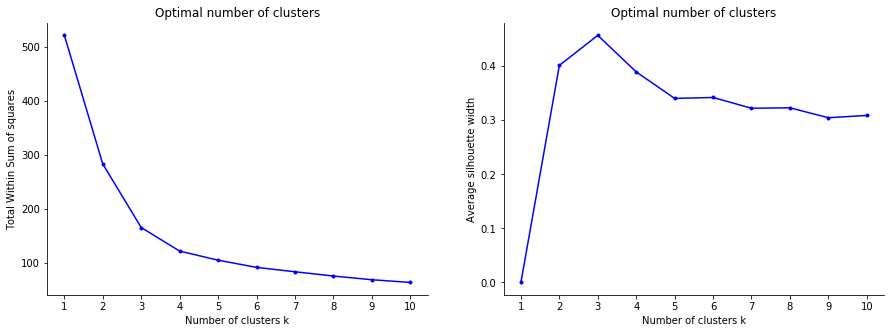

In [32]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(range(1,11), ss, 'bx-', marker=".")
ax[0].set_title("Optimal number of clusters")
ax[1].plot(range(1,11), scores, 'bx-', marker=".")
ax[0].set_ylabel("Total Within Sum of squares")
ax[1].set_ylabel("Average silhouette width")
for i in range(2):
    ax[i].set_xlabel("Number of clusters k")
    ax[i].set_title("Optimal number of clusters")
    ax[i].set_xticks([i for i in range(1,11)])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

Silhouette 값이 3에서 가장 높은 것을 알 수 있다. WSS에서은 3보다 큰 값일수록 점점 값이 작아지지만 해당 값에서 Silhouette width의 값이 많이 낮기 때문에 3이 적절한 K값이 되겠다

## 문제 3. 
K-means 클러스터링을 한 후, 다음과 같이 시각화하세요. (nstart = 1, iter.max =30, seed: 1234)

In [33]:
kmeans = KMeans(n_clusters=3, random_state=1234, max_iter=30, n_init=1).fit(data[num_cols])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1234)
p = pca.fit_transform(data[num_cols])
clust_data = pd.DataFrame({"Dim1":[i[0] for i in p], "Dim2":[i[1] for i in p]})

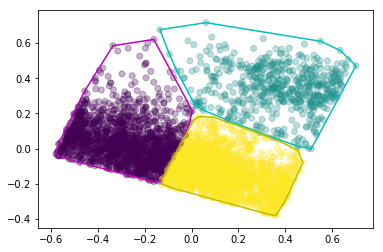

In [36]:
from scipy.spatial import ConvexHull
plt.scatter(clust_data['Dim1'], clust_data["Dim2"], c=labels, alpha=0.3)
clrs=['m','c','y']
for i in range(3):
    points = clust_data[labels==i]
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        plt.plot(points.iloc[simplex,0],points.iloc[simplex,1], clrs[i])

## 문제 4.
사용한 변수인 age, avg_glucose_level(평균 혈당), bmi(bmi 수치)에 대해 다음과 같이 box_plot 
시각화를 하고, 클러스터 별로 해석해보세요. (사용 색 : #845ec2, #ffc75f, #ff5e78

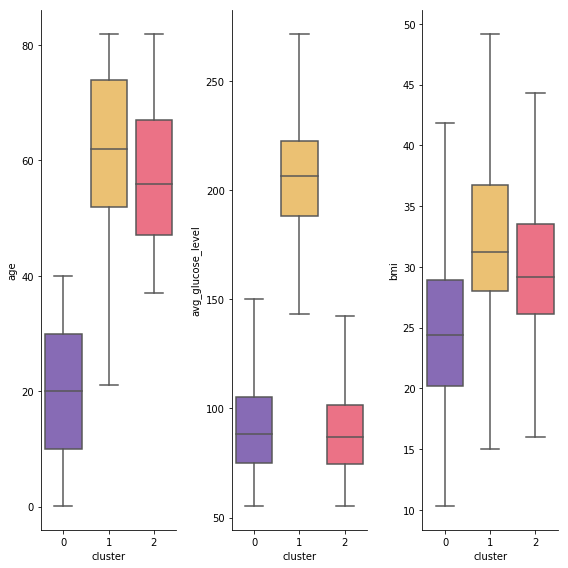

In [37]:
fig, ax = plt.subplots(1,3,figsize=(8,8))
for i, col in enumerate(num_cols):
    sns.boxplot(x=labels, y=col, data=origin_data, palette=['#845ec2', '#ffc75f', '#ff5e78'], ax=ax[i], showfliers=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_xlabel('cluster')
  
fig.tight_layout()
